<a href="https://colab.research.google.com/github/kdstheace/Project_FinancialAnalysis/blob/main/Financial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#1) 데이터 준비
# raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bankruptcy_data.csv')
# X = raw_data.drop('Bankrupt?', axis=1).drop(' Liability-Assets Flag', axis=1).drop(' Net Income Flag', axis=1)\
#             .drop(' Revenue Per Share (Yuan ¥)', axis=1).drop(' Operating Profit Per Share (Yuan ¥)', axis=1)\
#             .drop(' Per Share Net profit before tax (Yuan ¥)', axis=1).drop(' Interest-bearing debt interest rate', axis=1)

# y = np.array(raw_data['Bankrupt?'])
# print(raw_data.shape)
# print(X.shape)
# print(y.shape)

(6819, 96)
(6819, 89)
(6819,)


In [4]:
#데이터 준비
#데이터 불러오기
raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/data/bankruptcy_data.csv')
# raw_data = pd.read_csv('drive/MyDrive/Colab Notebooks/Data/data.csv')

raw_data.columns = raw_data.columns.str.strip()
raw_data.columns = raw_data.columns.str.replace(" " ,"_")
raw_data.rename(columns = {'Bankrupt?' :'Bankrupt' },inplace=True)

X = raw_data.drop('Bankrupt', axis=1).drop('Liability-Assets_Flag', axis=1).drop('Net_Income_Flag', axis=1)\
            .drop('Revenue_Per_Share_(Yuan_¥)', axis=1).drop('Operating_Profit_Per_Share_(Yuan_¥)', axis=1)\
            .drop('Per_Share_Net_profit_before_tax_(Yuan_¥)', axis=1).drop('Interest-bearing_debt_interest_rate', axis=1)\
            .drop('No-credit_Interval', axis=1)\
            .drop('Long-term_fund_suitability_ratio_(A)', axis=1)\
            .drop('Borrowing_dependency', axis=1)\
            .drop('Operating_profit_per_person', axis=1)\
            .drop('ROA(C)_before_interest_and_depreciation_before_interest', axis=1)\
            .drop('ROA(A)_before_interest_and_%_after_tax', axis=1)\
            .drop('Net_Value_Per_Share_(B)', axis=1)\
            .drop('Net_Value_Per_Share_(A)', axis=1)\
            .drop('Net_Value_Per_Share_(C)', axis=1)\
            .drop('Realized_Sales_Gross_Margin', axis=1)\
            .drop('Realized_Sales_Gross_Profit_Growth_Rate', axis=1)\
            .drop('Interest_Coverage_Ratio_(Interest_expense_to_EBIT)', axis=1)\
            .drop('Cash_Reinvestment_%', axis=1).drop('Interest_Expense_Ratio', axis=1).drop('Contingent_liabilities/Net_worth', axis=1)\
            .drop('Operating_profit/Paid-in_capital', axis=1).drop('Net_profit_before_tax/Paid-in_capital', axis=1)\
            .drop('Cash_flow_rate', axis=1)

y = np.array(raw_data['Bankrupt'])
print(X.shape)
print(y.shape)

(6819, 71)
(6819,)


In [5]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)
display(scaled_X)

categorized_y = to_categorical(y)
print(categorized_y.shape)

,ROA(B)_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Operating_Profit_Rate,Pre-tax_net_Interest_Rate,After-tax_net_Interest_Rate,Non-industry_income_and_expenditure/revenue,Continuous_interest_rate_(after_tax),Operating_Expense_Rate,Research_and_development_expense_rate,Tax_rate_(A),Persistent_EPS_in_the_Last_Four_Seasons,Cash_Flow_Per_Share,Operating_Profit_Growth_Rate,After-tax_Net_Profit_Growth_Rate,Regular_Net_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Current_Ratio,Quick_Ratio,Total_debt/Total_net_worth,Debt_ratio_%,Net_worth/Assets,Inventory_and_accounts_receivable/Net_value,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_(times),Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_(times),Revenue_per_person,Allocation_rate_per_person,Working_Capital_to_Total_Assets,Quick_Assets/Total_Assets,Current_Assets/Total_Assets,Cash/Total_Assets,Quick_Assets/Current_Liability,Cash/Current_Liability,Current_Liability_to_Assets,Operating_Funds_to_Liability,Inventory/Working_Capital,Inventory/Current_Liability,Current_Liabilities/Liability,Working_Capital/Equity,Current_Liabilities/Equity,Long-term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income/Total_expense,Total_expense/Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Working_capitcal_Turnover_Rate,Cash_Turnover_Rate,Cash_Flow_to_Sales,Fixed_Assets_to_Assets,Current_Liability_to_Liability,Current_Liability_to_Equity,Equity_to_Long-term_Liability,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,Gross_Profit_to_Sales,Net_Income_to_Stockholder's_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_(DFL),Equity_to_Liability
0,-2.400361,-0.383334,0.016456,-0.023516,-0.020165,-0.087479,-0.031281,-0.616334,-0.750713,-0.829388,-1.794106,-0.671081,0.019997,-0.012031,-0.012262,-0.010299,-0.182259,-0.013721,-0.119118,-0.012111,-0.034237,-0.026226,1.750845,-1.750845,-0.332027,-0.540344,-0.045967,-0.038333,-0.661726,-0.407123,-0.155185,-0.017024,-0.038222,-2.393729,-1.155833,-1.520572,-0.861820,-0.020937,-0.072818,1.126267,-0.563752,-0.045371,-0.095887,-0.412896,-1.245334,0.568487,-0.094979,-1.232594,-0.043610,1.314027,-0.175421,1.299751,-0.019619,-0.685397,0.003948,-0.012111,-0.412896,0.568487,0.558428,-0.257031,-0.108218,-1.247231,-0.206594,2.812493,-2.254317,-0.049491,-0.383465,-0.861611,0.680171,-0.060031,-0.622067
1,-0.598450,0.135068,0.014671,0.014799,0.015966,-0.005957,0.009823,-0.616334,-0.750713,-0.829388,-0.597379,-0.303533,0.010035,0.039473,0.039663,-0.001930,0.207732,-0.013721,0.027847,-0.012111,-0.034237,-0.026226,1.075727,-1.075727,-0.355356,-0.762702,-0.045967,-0.038333,2.220288,-0.116896,-0.357471,-0.017024,-0.038222,-1.067133,-1.351081,-1.558280,-0.783873,-0.020937,-0.072818,-0.670363,-0.361990,1.169887,-0.095887,-2.192039,-0.328953,-0.123797,-0.094979,-0.143474,-0.026740,-0.135126,-0.423919,1.640522,-0.010126,0.006134,0.004193,-0.012111,-2.192039,-0.123797,0.269947,-0.182201,-0.095129,-0.449376,-0.109511,0.527485,-0.309033,-0.049491,0.135253,-0.029804,0.240685,15.129816,-0.535573
2,-1.319910,-0.383759,0.007858,-0.061111,-0.051183,-0.142238,-0.086566,-0.616334,-0.740898,-0.829388,-1.450153,-0.930172,0.010605,0.022853,0.022981,-0.003748,0.611527,-0.013721,-0.006595,-0.012111,-0.034237,-0.026226,1.749724,-1.749724,0.309321,-1.251890,-0.045967,-0.038333,-0.641712,0.662558,-0.687284,-0.017024,-0.038222,0.260402,-0.296712,0.369252,-0.884109,-0.020937,10.391338,0.148933,-0.486462,0.005772,-0.095887,-1.526996,0.591934,0.249651,-0.094979,-0.971327,-0.040430,-0.287204,-0.423919,-0.641164,0.055319,-0.582280,0.004340,-0.012111,-1.526996,0.249651,0.116638,-0.147060,-0.086679,-0.937979,-0.082328,-0.199721,-0.820510,-0.049491,-0.383698,-0.249820,0.679247,-0.062961

(6819, 2)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, categorized_y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5455, 71)
(1364, 71)
(5455, 2)
(1364, 2)


In [6]:
model = Sequential()

model.add(Dense(units=100, activation='relu', input_dim=71))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=25, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               7200      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                260       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 22        
Total params: 13,807
Trainable params: 13,807
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer='Adam', loss='mae', metrics=['accuracy'])
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
171/171 [==============================] - 1s 5ms/step - loss: 0.2007 - accuracy: 0.8966 - val_loss: 0.0369 - val_accuracy: 0.9633
Epoch 2/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9684 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 3/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9690 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 4/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9706 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 5/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0310 - accuracy: 0.9691 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 6/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9672 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 7/50
171/171 [==============================] - 0s 2ms/step - loss: 0.0334 - accuracy: 0.9666 - val_loss: 0.0367 - val_accuracy: 0.9633
Epoch 

In [9]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]*100))
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

43/43 [==============================] - 0s 928us/step - loss: 0.0367 - accuracy: 0.9633

loss: 3.67%

accuracy: 96.33%


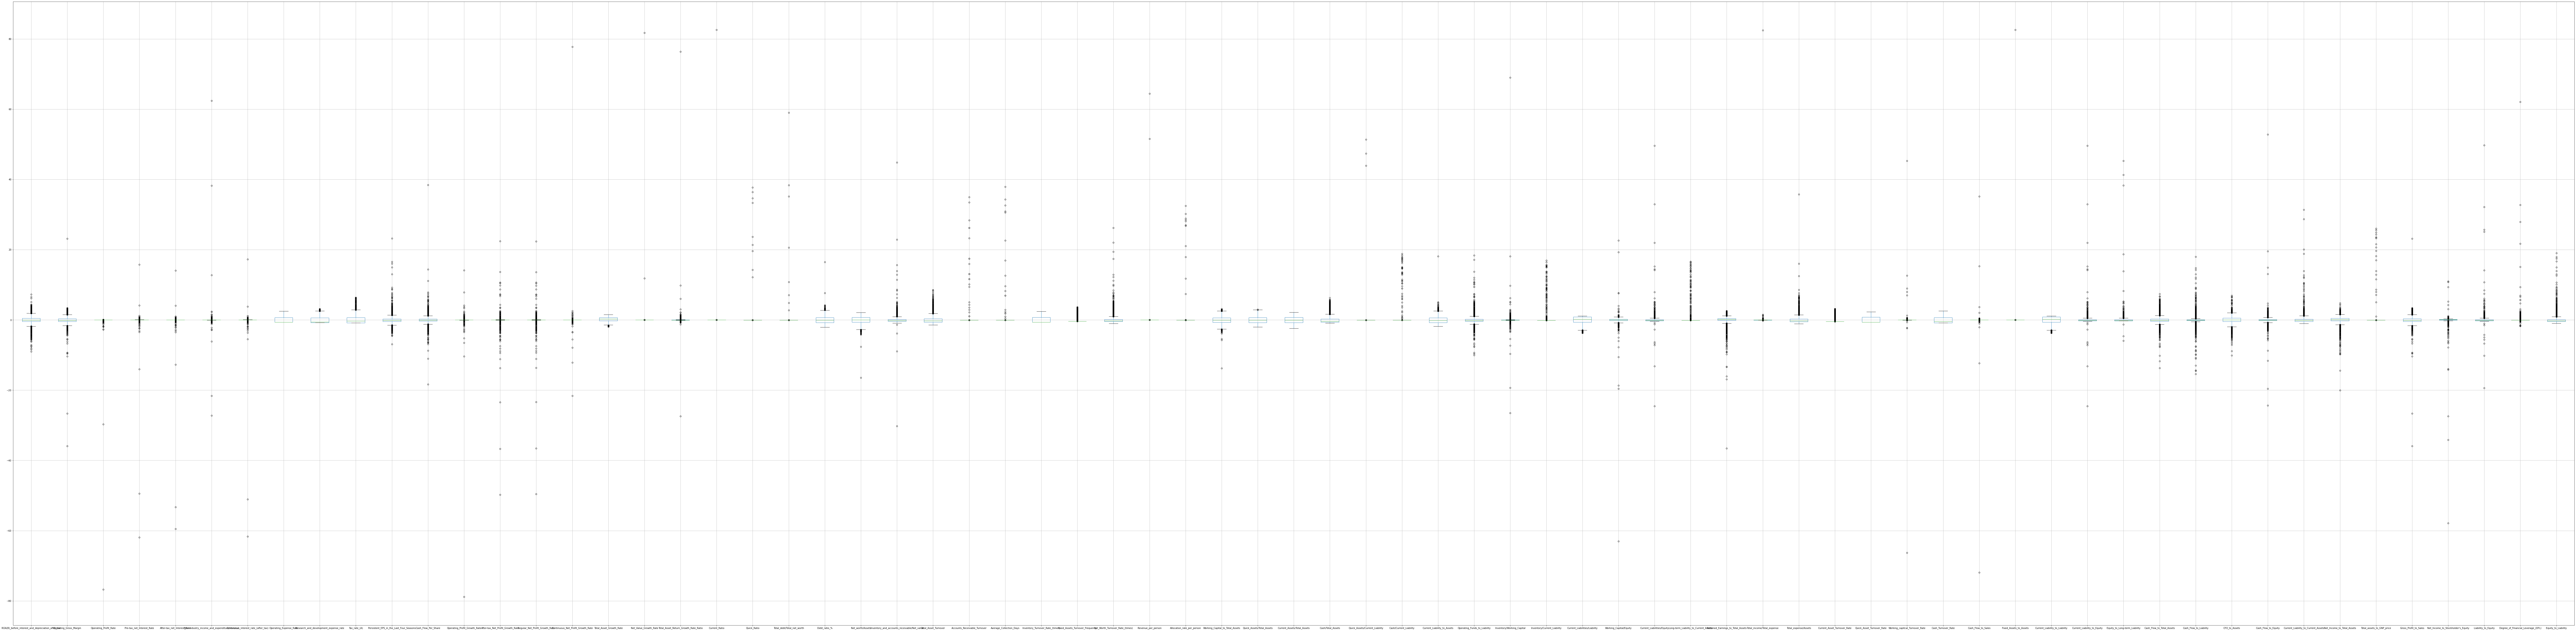

In [10]:
plt.rcParams['figure.figsize'] = (200, 50)
bp = scaled_X.boxplot()

In [ ]:
pred = model.predict(X_test)
print(pred.shape)
for i in range(1364):
  if np.argmax(pred[i]) != np.argmax(y_test[i]):
    print(i)

(1364, 2)
6
11
15
39
46
73
78
88
209
214
303
432
458
476
591
668
695
703
707
749
784
810
814
834
897
901
915
971
995
998
1003
1013
1017
1060
1073
1081
1086
1113
1134
1144
1164
1172
1173
1185
1225
1262
1270
1272
1280
1306
1310
1320
1321
1340
1343
1354


In [ ]:
labels=['nope', 'yes']

In [ ]:
i=1277
print(labels[np.argmax(y_test[i])])
print(labels[np.argmax(pred[i])])

nope
nope


In [ ]:
X.isnull().sum()

 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
 Realized Sales Gross Margin                                0
                                                           ..
 Net Income to Stockholder's Equity                         0
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Equity to Liability                                        0
Length: 89, dtype: int64

In [ ]:
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 100)

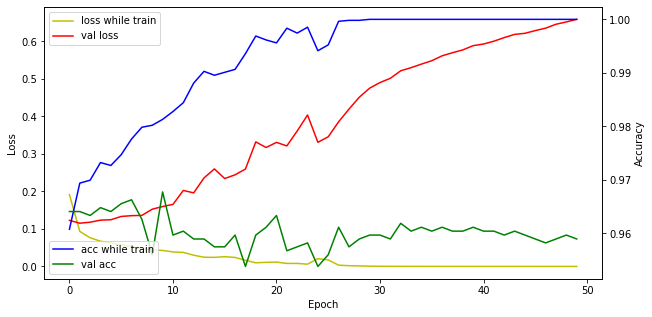

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()


loss_ax.plot(hist.history['loss'], 'y', label='loss while train')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


acc_ax.plot(hist.history['accuracy'], 'b', label='acc while train')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('Epoch')
loss_ax.set_ylabel('Loss')
acc_ax.set_ylabel('Accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()